In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

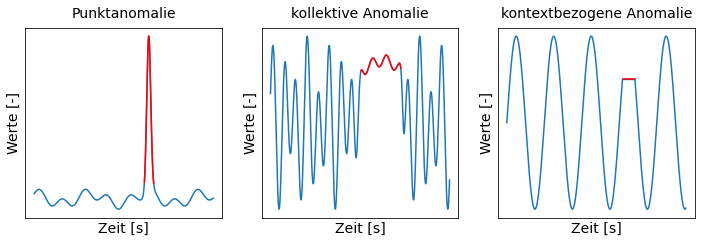

In [96]:
fig, axs = plt.subplots(1,3,figsize=(12,3.5))

time = np.linspace(0,10, 1000)

outlier = np.sin(time*5)*0.1 + np.cos(time*2)*0.1
peak = np.exp(-40*(time-6.4)**2)*3
outlier += peak

outlier_highlight_time = time[outlier > 0.3]
outlier_highlight = outlier[outlier > 0.3]

collective = np.sin(time*10) + np.cos(time*6)*0.5 + np.random.normal(0, 0.1)
group_mask = np.concatenate(
    (tf.math.sigmoid(np.linspace(-60,20,650)),
    tf.math.sigmoid(np.linspace(20,-60,350)))
)
group = (np.sin(time*8)*0.1 + np.cos(time*2)*0.1)+1
collective = (1-group_mask)*collective+group_mask*group

collective_hightlight_time = time[group_mask > 0.9]
collective_hightlight = collective[group_mask > 0.9]

context = np.sin(3*time)
clipped = np.clip(context[600:800], -1, 0.5)
context[600:800] = clipped

context_highlight_time = np.linspace(6,8,200)[clipped == 0.5]
context_highlight = np.ones((len(context_highlight_time),))*0.5

def plot_type(ax, values, highlight_time, highlight, annotation):

    ax.plot(time, values)
    ax.plot(highlight_time, highlight, color='r', linewidth=1.5)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Zeit [s]', fontsize=14)
    ax.set_ylabel('Werte [-]', fontsize=14)

    ax.text(0.5, 1.05, annotation, transform=ax.transAxes, size=14, horizontalalignment='center')

plot_type(axs[0], outlier, outlier_highlight_time, outlier_highlight, 'Punktanomalie')
plot_type(axs[1], collective, collective_hightlight_time, collective_hightlight, 'kollektive Anomalie')
plot_type(axs[2], context, context_highlight_time, context_highlight, 'kontextbezogene Anomalie')

fig.savefig('anomalytypes.pdf', bbox_inches='tight')